<a href="https://colab.research.google.com/github/BilalBoudjema/MMDMProjetFAUXBILLETS/blob/main/projet_faux_billets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des bibliothéques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PARTIE 1

Importation des données

In [ ]:
data_initiale = np.loadtxt('bank_auth.txt', delimiter=',')
data_initiale = np.array(data_initiale)
data_initiale.shape

(1372, 5)

**Question 1**: Sauvegardez cet ensemble de données dans deux variables : bank_data pour les données et bank_labels pour les étiquettes.

In [ ]:
# L'ensemble des données (L'ensemble de toutes les colonnes sauf la dernière)
bank_data = data_initiale[:, :-1]
bank_data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
# L'ensemble des étiquettes (La dernière colonne)
bank_labels = data_initiale[:, 4]
bank_labels

array([0., 0., 0., ..., 1., 1., 1.])

**Question 2**: Créez deux matrices A_faux (que des faux billets) et A_vrais (que des vrais billets).

In [ ]:
# Création de la matrice A_faux qui représente les faux billets

# Toutes les lignes ayant 0 comme valeur de la dernière colonne (étiquettes)
list_bool_faux = bank_labels == 0 # list_bool_faux est une liste booléan (si bank_labels[i] == 0 donc list_bool_faux[i] = True sinon list_bool_faux[i] = False)
A_faux = bank_data[list_bool_faux]
A_faux.shape

(762, 4)

In [ ]:
# Création de la matrice A_vrai qui représente les vrais billets

# Toutes les lignes ayant 1 comme valeur de la dernière colonne (étiquettes)
list_bool_vrai = bank_labels == 1 # list_bool_faux est une liste booléan (si bank_labels[i] == 1 donc list_bool_vrai[i] = True sinon list_bool_vrai[i] = False)
A_vrai = bank_data[list_bool_vrai]
A_vrai.shape

(610, 4)

**Question 3**: Ensuite, créez deux matrices bank_train (500 objets de A_vrai et 600 objets de A_faux) et bank test (le reste).

In [ ]:
# Création de 500 objets de A_vrai, et 600 objets de A_faux

# A_vrai_500 contient les lignes d'indice 0 à 499 de la matrice A_vrai
A_vrai_500 = A_vrai[:500, :]

# A_faux_600 contient les lignes d'indice 0 à 599 de la matrice A_faux
A_faux_600 = A_faux[:600, :]

# Concaténation de la matrice A_vrai_500 et A_faux_600 en une matrice 
bank_train = np.concatenate( (A_vrai_500, A_faux_600) )
bank_train.shape

(1100, 4)

In [ ]:
# Création d'une matrice labels pour la matrice bank_train

# ones_500 est un tableau numpy qui contient 500 ligne remplie de 1
ones_500 = np.ones( (500, 1) )

# zeros_600 est un tableau numpy qui contient 600 ligne remplie de 0
zeros_600 = np.zeros( (600, 1) )

# Création de la matrice bank_train_labels qui est le resultat de la concatenation du ones_500 et zeros_600
bank_train_labels = np.concatenate( (ones_500, zeros_600) )
bank_train_labels.shape

(1100, 1)

In [ ]:
# Création de bank_test qui contient le reste des objet de A_vrai aprés les 500 objet et le reste de A_faux aprés les 600 objets

# A_vrai_reste contient les lignes d'indice 500 jusqu'à la fin de la matrice A_vrai
A_vrai_reste = A_vrai[500: , :]

# A_faux_reste contient les lignes d'indice 600 jusqu'à la fin de la matrice A_faux
A_faux_reste = A_faux[600: , :]

# Création de la matrice bank_test qui est le resultat de la concatenation du A_vrai_reste et A_faux_reste
bank_test = np.concatenate( (A_vrai_reste, A_faux_reste) )
bank_test.shape

(272, 4)

In [ ]:
# Création d'une matrice labels pour la matrice bank_test

# nbr_A_vrai_reste contient le nombre de ligne de la matrice A_vrai_reste
nbr_A_vrai_reste = A_vrai_reste.shape[0]

# nbr_A_faux_reste contient le nombre de ligne de la matrice A_faux_reste
nbr_A_faux_reste = A_faux_reste.shape[0]

# la matrice ones_reste est un tableau numpy qui contient que des 1 
ones_reste = np.ones( (nbr_A_vrai_reste, 1) )

# la matrice zeros_reste est un tableau numpy qui contient que des 0
zeros_reste = np.zeros( (nbr_A_faux_reste, 1) )

# Création de la matrice bank_test_labels qui est la matrice d'étiquettes de données de test (bank_test)
bank_test_labels = np.concatenate( (ones_reste, zeros_reste) )
bank_test_labels.shape

(272, 1)

**Question 4**: Visualisez les données dans une figure séparée en utilisant la fonction Scatter.

In [ ]:
from sklearn.decomposition import PCA

# Création d'un objet de la classe PCA (Réduction de dimension : dimension 4 en dimension 2)
PCA_object = PCA(n_components = 2)

# Transformation des données (bank_data) en 2 dimension 
PCA_object.fit(bank_data)
bank_data_pca = PCA_object.transform(bank_data)

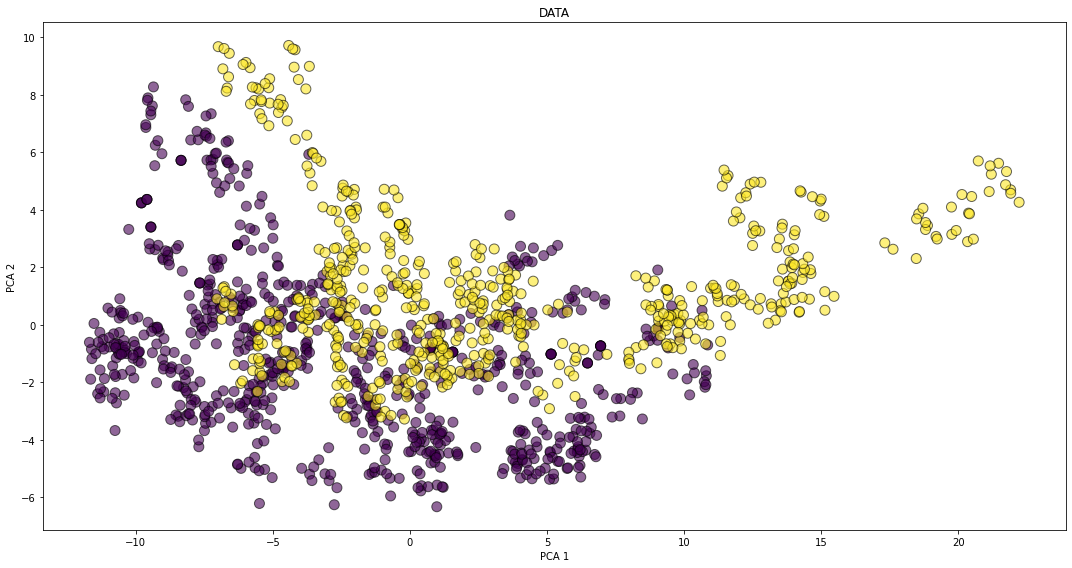

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(bank_data_pca[:, 0], bank_data_pca[:, 1], s=100, c = bank_labels, edgecolor='black', linewidth=1, alpha=0.6)
plt.title('DATA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

## Partie 2

**Question 1**: Appliquez la Semi-NMF à la matrice bank_train en utilisant la fonction seminmfnnls. Sauvegardez la matrice de prototypes obtenue dans W_train.

In [ ]:
import pymf as PYMF

# Application de la semmi NMF sur la transposée de la matrice bank_train
semiNMF = PYMF.SNMF(bank_train.T, num_base = 2)

# Application de la factorisation
semiNMF.factorize()

# Récuperation de la matrice w_train et H_train
W_train = semiNMF.W
H_train = semiNMF.H

**Question 2**: Ecrivez un programme show clusters pour transformer la matrice de partition obtenue à une vraie matrice de partition I (On
cherche un élément maximal dans chaque ligne et on le remplace
par 1. Tous les autres éléments sont remplacées par 0.). Calculez
la puretée pour la matrice de partition obtenue précédemment.


In [ ]:
# La procédure shwo_clusters() qui permet de transformer la matrice de partition (H_train) à une matrice de 0 et 1
def show_clusters(X):
    # La variable leX contient lenombre de ligne et de colonne de X
    lenX = np.shape(X)
      
    for i in range(0, lenX[0]):
        # maxX contient le maximum de chaque ligne i de la matrice X
        maxX = np.max(X[i])
        for j in range(0, lenX[1]):
            if X[i][j] == maxX:
                # Si l'élément (i, j) de la matrice X égale à p (le maximum de la ligne i) donc ce élément recoit 1
                X[i][j] = 1
            else :
                # Sinon, l'élément (i, j) de la matrice X recoit 0
                X[i][j] = 0
    return(X)

In [ ]:
# Application de la procédure show_clusters() sur la matrice de partition (H_train)
show_clusters(H_train)
H_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn import metrics

# Calcule la pureté qui indique la précision de l'algorithme de classification.
purete_I_partition = metrics.accuracy_score(H_train[1, :], bank_train_labels)
purete_I_partition

0.5463636363636364

**Question 3**: Classifiez les objets sauvegardés dans bank_test en utilisant la matrice de prototypes W_train apprise pécédemment *(H_test=W train−1∗bank test)*. 
Attention! Au cas ou la matrice W_train est une matrice non carrée, on utilise le pseudo-inverse de Moore-Penrose (la commande pinv).

In [ ]:
# Transformation de la matrice H_test
H_test = np.dot(np.linalg.pinv(W_train), bank_test.T)
H_test

array([[-0.09711049, -0.33972794, -0.10930714, ...,  0.99465564,
         0.59012371,  0.67891126],
       [-0.1034593 ,  0.01456922,  1.22049564, ...,  0.98977251,
         0.09118193,  0.15410128],
       [-0.38343679,  1.2905801 ,  1.99011503, ...,  1.23964802,
        -0.09121002, -0.01520701],
       [ 0.19092345, -0.54647691,  0.66034757, ...,  1.34390416,
         0.26489205,  0.71518345]])

In [ ]:
H_labels = show_clusters(H_test.T)
H_labels = H_labels[:, 1]
H_labels

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

**Question 4**: Calculez les indices externes (la pureté et l’entropie pour la matrice de partition H_test). Pour cela, on utilise les commande purity et entropy.


**l'entropie:** est une valeur comprise entre 0 et 1, elle sert à mesurer la performance des algorithmes (chaque fois qu'on s'approche de 0, les clusters sont performant) et montre comment les différentes classes sémantiques sont réparties au sein de chaque groupe.

**La pureté:** est une valeur comprise entre 0 et 1, elle sert à mesurer la performance des algorithmes (chaque fois qu'on s'approche de 1, les clusters sont performant) et la proportion de données d’une classe ayant l’étiquette la plus fréquente.

In [ ]:
# Calcule des indices externes
# 1. Calcule de Pureté
purete_semi_nmf = metrics.accuracy_score(H_labels,bank_test_labels)
print("La pureté est :", purete_semi_nmf)

# Calcule d'Entropy
entropy_semi_nmf = metrics.cluster.entropy(H_labels)
print("L'entropie est :", entropy_semi_nmf)

La pureté est : 0.6727941176470589
L'entropie est : 0.4364860964844384


**Question 5**: Calculez les indices internes (l’indice DB de Davies et Bouldin, l’indice CH de Calinsky et Harabsz, l’indice KL de Krzanowski et Lai et l’indice de Dunn) pour la matrice de partition H_test. Pour cela, on utilise la commande valid internal deviation.

**Les indices internes** sont des mesures de qualité d'une partition d'un ensemble de données en classification automatique.

**DB de Davies et Bouldin:** repose sur la notion de similarité de 2 cluster.Plus la valeur de DB est plus petite plus la qualité du clustering est plus grande .

**CH de Calinsky et Harabsz:** est le rapport entre la variance inter-groupes et la variance intra. Plus les classes sont compactes et séparables, CH est à maximiser.

In [ ]:
# Calcule des indices internes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_SEMI_NMF  = metrics.cluster.davies_bouldin_score(bank_test, H_labels)
print("L'ndice de Davies et Bouldin :", davies_bouldin_score_SEMI_NMF)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_SEMI_NMF = metrics.cluster.calinski_harabasz_score(bank_test, H_labels)
print("L'ndice de Calinsky et Harabsz :", calinski_harabasz_score_SEMI_NMF)

L'ndice de Davies et Bouldin : 0.772139212407063
L'ndice de Calinsky et Harabsz : 181.95164707478563


**Question 6**:  Visualisez les données avec les étiquettes obtenues en utilisant la fonction Scatter.


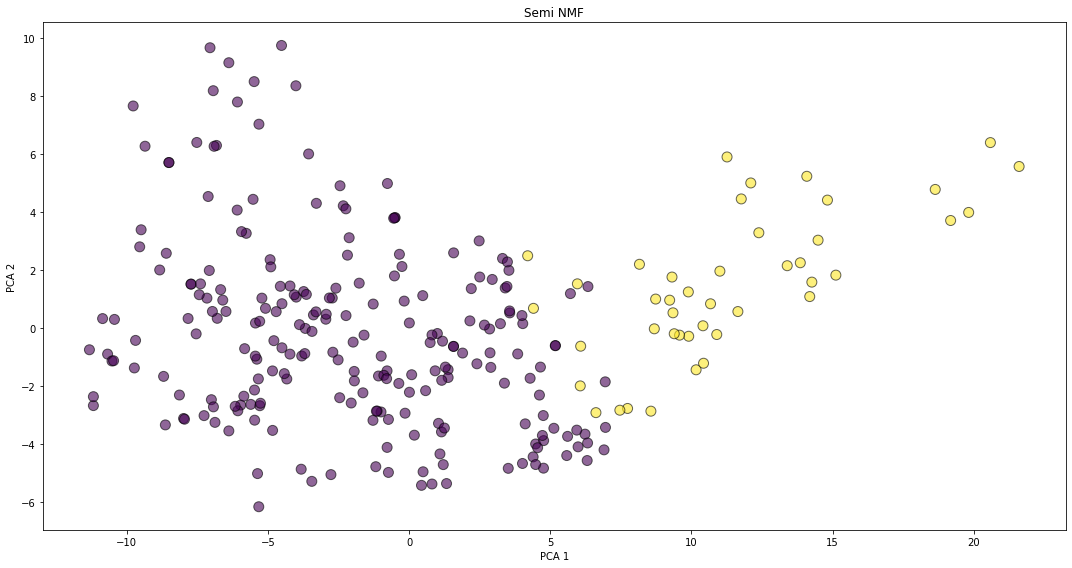

In [ ]:
bank_test_pca = PCA_object.fit_transform(bank_test)

plt.figure(figsize=(15,8))
plt.scatter(bank_test_pca[:,0], bank_test_pca[:,1], s=100, c= H_labels, edgecolor='black', linewidth=1, alpha=0.6)
plt.title('Semi NMF')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

## PARTIE 3

**Question 1**: Appliquez la NMF à la matrice bank_train en utilisant la fonction nmf. Sauvegardez la matrice de prototypes obtenue dans W_train.

In [ ]:
# Puisque NMF ne prend que des données positives, nous allons utiliser la fonction to_positive() sur nos données négatives pour les adapter à ces dernières.
def to_positive(X):
    # Le nombre de lignes et de colonnes
    lenX = np.shape(X)

    # Le minimum de X
    minX = np.min(X) 
     
    for i in range(0,lenX[0]):
        for j in range(0,lenX[1]):
            if minX < 0:
                X[i][j]= X[i][j] - minX
            else :
                X[i][j]= X[i][j] + minX 
    return(X)

In [ ]:
# Application de la NMF sur la transposée de la matrice bank_train convertit en valeurs positives
NMF = PYMF.NMF(to_positive(bank_train).T, num_bases = 2)

# Application de la factorisation
NMF.factorize()

# Récuperation de la matrice w_train et H_train
W_train = NMF.W
H_train = NMF.H

**Question 2**: Ecrivez un programme show clusters pour transformer la matrice de partition obtenue à une vraie matrice de partition I (On cherche un élément maximal dans chaque ligne et on le remplace par 1. Tous les autres éléments sont remplacées par 0.). Calculez la puretée pour la matrice de partition obtenue précédemment.

In [ ]:
# Le programme showcluster() est déja programmer dans la PARTIE 2  
show_clusters(H_train)
H_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn import metrics

# 1. Calcule de Pureté
purete_I_partition = metrics.accuracy_score(H_train[1, :], bank_train_labels)
purete_I_partition

0.5463636363636364

**Question 3**: Classifiez les objets sauvegardés dans bank_test en utilisant la matrice de prototypes W_train apprise pécédemment *(H_test=W train−1∗bank test)*. 
Attention! Au cas ou la matrice W_train est une matrice non carrée, on utilise le pseudo-inverse de Moore-Penrose (la commande pinv).

In [ ]:
# La matrice W_train n'est pas carrée
H_test = np.dot(np.linalg.pinv(W_train), bank_test.T)
H_test

array([[ -0.17784241,   4.26791147,   4.35449422,   2.57018528,
         -2.74247035, -13.5409036 , -19.66927735, -10.03037926,
         -0.47349609,   5.33237299,   3.69622265,  -1.90585875,
        -11.13107415, -15.38430751,  -5.8423643 ,   2.02934107,
          5.80700485,   5.71106856,  -1.73140331,  -9.0897778 ,
         -9.41638011,   0.76031213,   6.28739754,   6.82239973,
          7.61470937,   1.10296641,  -3.13489589,  -2.76235428,
          3.24529238,   5.37113671,   4.44211238,   2.55132666,
          7.17159369,   1.3291854 ,  -1.31161828,  -0.3415603 ,
          3.52409091,   2.77236192,   0.91761993,   0.60366476,
         -2.86339223, -11.32253617, -10.90052951,   2.92824698,
          1.86563116,  -7.67668802, -20.99096559, -13.96967829,
         -2.61256524,   3.54034414,  -0.17321705, -10.95811083,
        -19.78013911, -13.29080083,  -1.46916609,   3.29231755,
          3.60483286,   0.26369074,  -9.41133029, -14.11065588,
         -9.04432999,  -0.11455222,   4.

In [ ]:
H_labels = show_clusters(H_test.T)
H_labels = H_labels[:, 0]
H_labels

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1.

**Question 4**: Calculez les indices externes (la pureté et l’entropie pour la matrice de partition H_test). Pour cela, on utilise les commande purity et entropy.

In [ ]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_nmf = metrics.accuracy_score(H_labels,bank_test_labels)
print("La pureté est :", purete_nmf)

# 2. Calcule d'Entropy
entropy_nmf = metrics.cluster.entropy(H_labels)
print("L'entropie est :", entropy_nmf)

La pureté est : 0.41911764705882354
L'entropie est : 0.6747599834106597


**Question 5**: Calculez les indices internes (l’indice DB de Davies et Bouldin, l’indice CH de Calinsky et Harabsz, l’indice KL de Krzanowski et Lai et l’indice de Dunn) pour la matrice de partition H_test. Pour cela, on utilise la commande valid internal deviation.

In [ ]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_NMF  = metrics.cluster.davies_bouldin_score(bank_test,H_labels)
print("L'ndice de Davies et Bouldin :", davies_bouldin_score_NMF)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_NMF = metrics.cluster.calinski_harabasz_score(bank_test,H_labels)
print("L'ndice de Calinsky et Harabsz :", calinski_harabasz_score_NMF)

L'ndice de Davies et Bouldin : 0.9296592671029995
L'ndice de Calinsky et Harabsz : 260.91046599249813


**Question 6**:  Visualisez les données avec les étiquettes obtenues en utilisant la fonction Scatter().

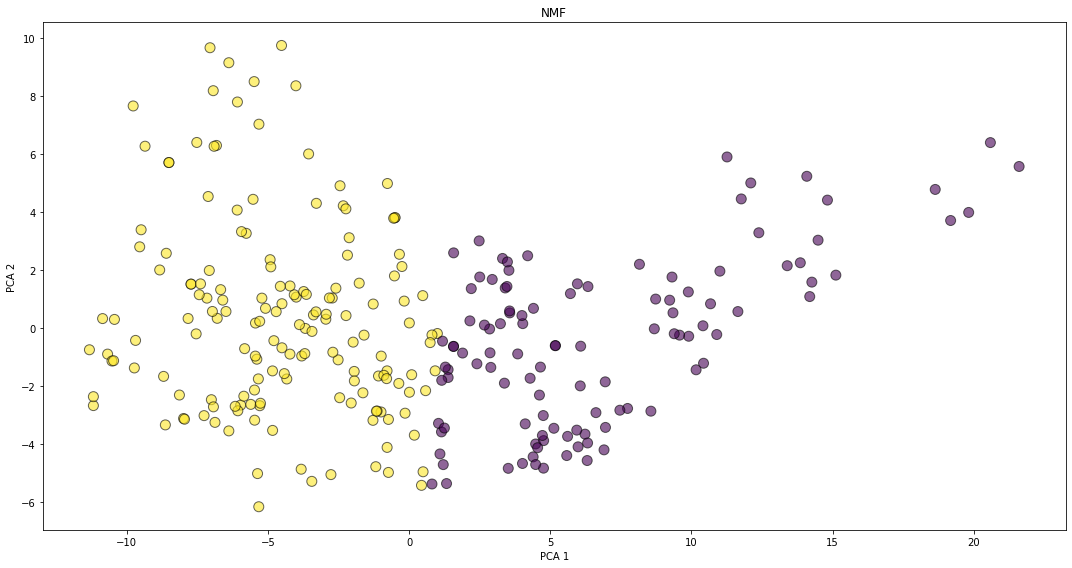

In [ ]:
bank_test_pca = PCA_object.fit_transform(bank_test)

plt.figure(figsize=(15,8))
plt.scatter(bank_test_pca[:,0], bank_test_pca[:,1], s=100, c= H_labels, edgecolor='black', linewidth=1, alpha=0.6);
plt.title('NMF')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

## PARTIE 4

**Question**:  Appliquez Symmetric NMF à la matrice K_test.

In [ ]:
# Avant d'appliquer le NMF symétrique, il faut d'abord l'implémenter (Car elle n'existe pas dans python).
def symetricNMF(X, n_components, nbr_iter=None):       
    shapeX = len(X)

    # W est une matrice aléatoire de shapeX ligne et n_components colonne
    W = np.random.rand(shapeX, n_components)

    # Application de la mise à jour sur la matrice W 
    for t in range(1, nbr_iter):
        W = np.multiply(W, (0.5 + np.dot(0.5, (np.dot(X, W))) / (np.dot(np.dot(W, W.T), W))))
    return W

### σ = 1

**Question 1**: Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec σ = 1.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
K_test = rbf_kernel(bank_test, bank_test, 1)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.


In [ ]:
matSymetricP1 = symetricNMF(K_test, 2, 1)
matResultP1 = show_clusters(matSymetricP1)
matResultP1 = matResultP1[:, 0]
matResultP1

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [ ]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF_P1 =  metrics.accuracy_score(matResultP1, bank_test_labels)
print("La pureté est :", purete_symetricNMF_P1)

# 2. Calcule de Entropy
entropy_symetricNMF_P1 = metrics.cluster.entropy(matResultP1)
print("L'entropie est :", entropy_symetricNMF_P1)

La pureté est : 0.46691176470588236
L'entropie est : 0.693120147444376


In [ ]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMFP1  = metrics.cluster.davies_bouldin_score(bank_test, matResultP1)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMFP1)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMFP1  = metrics.cluster.calinski_harabasz_score(bank_test, matResultP1)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMFP1)

L'indice de Davies et Bouldin est : 12.933546194320297
L'indice de CH de Calinsky et Harabsz est : 1.2919347848404477


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction Scatter

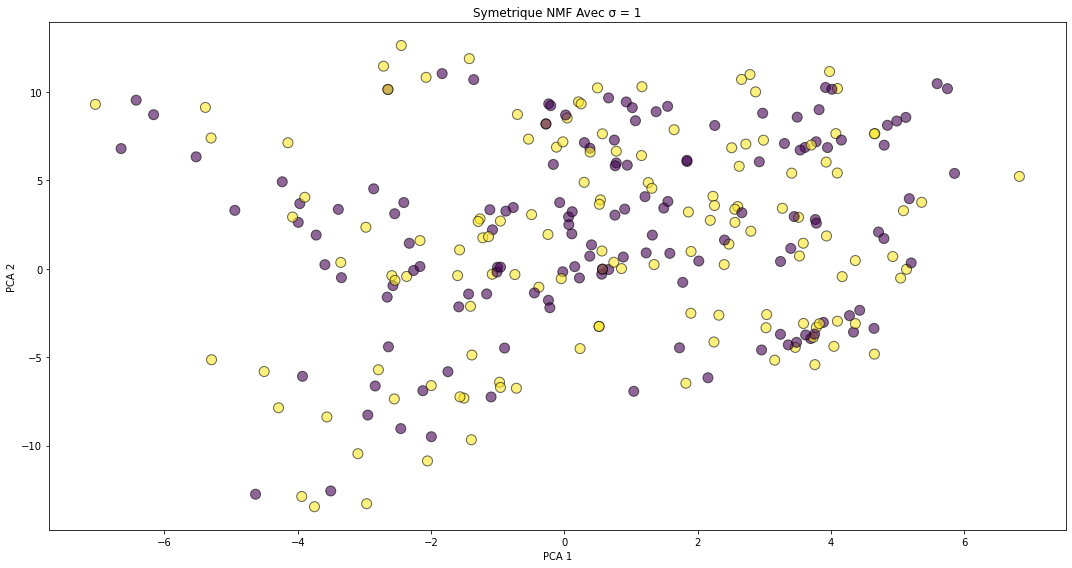

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 100, c = matResultP1, edgecolor='black', linewidth=1, alpha=0.6);
plt.title('Symetrique NMF Avec σ = 1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

### σ = 2

**Question 1:** Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec σ = 2.

In [ ]:
K_test = rbf_kernel(bank_test, bank_test, 2)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.

In [ ]:
matSymetricP2 = symetricNMF(K_test, 2, 1)
matResultP2 = show_clusters(matSymetricP2)
matResultP2 = matResultP2[:, 0]
matResultP2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0.

In [ ]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF_P2 =  metrics.accuracy_score(matResultP2, bank_test_labels)
print("La pureté est :", purete_symetricNMF_P2)

# 2. Calcule d'Entropy
entropy_symetricNMF_P2 = metrics.cluster.entropy(matResultP2)
print("L'entropie est :", entropy_symetricNMF_P2)

La pureté est : 0.5147058823529411
L'entropie est : 0.6878393399287344


In [ ]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMFP2  = metrics.cluster.davies_bouldin_score(bank_test, matResultP2)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMFP2)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMFP2  = metrics.cluster.calinski_harabasz_score(bank_test, matResultP2)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMFP2)

L'indice de Davies et Bouldin est : 22.69267288919437
L'indice de CH de Calinsky et Harabsz est : 0.4110909950734469


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters?

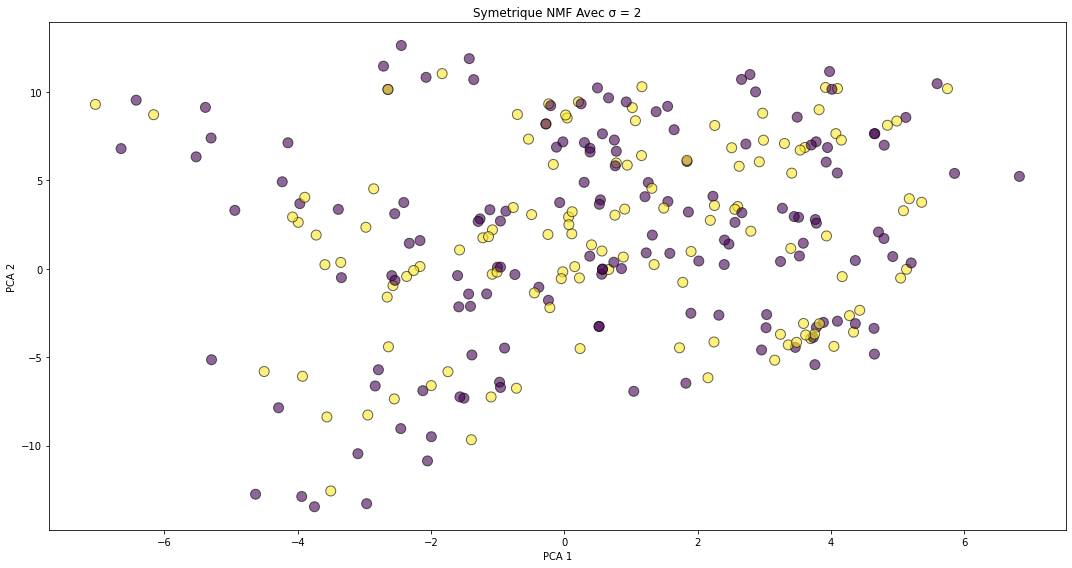

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 100, c = matResultP2, edgecolor='black', linewidth=1, alpha=0.6);
plt.title('Symetrique NMF Avec σ = 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

### paramètres [1, 0, 2]

**Question 1:** Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec les paramètres [1, 0, 2].

In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
K_test = polynomial_kernel(bank_test, bank_test, 1, 0, 2)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.

In [ ]:
matSymetricP102 = symetricNMF(K_test, 2, 1)
matResult102 = show_clusters(matSymetricP102)
matResult102 = matResult102[:, 0]
matResult102

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0.

In [ ]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF_P102 =  metrics.accuracy_score(matResult102, bank_test_labels)
print("La pureté est :", purete_symetricNMF_P102)

# 2. Calcule d'Entropy
entropy_symetricNMF_P102 = metrics.cluster.entropy(matResult102)
print("L'entropie est :", entropy_symetricNMF_P102)

La pureté est : 0.5073529411764706
L'entropie est : 0.6931471805599454


In [ ]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMF102  = metrics.cluster.davies_bouldin_score(bank_test, matResult102)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMF102)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMF102 = metrics.cluster.calinski_harabasz_score(bank_test, matResult102)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMF102)

L'indice de Davies et Bouldin est : 16.095463177457223
L'indice de CH de Calinsky et Harabsz est : 0.8313814301733414


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters?

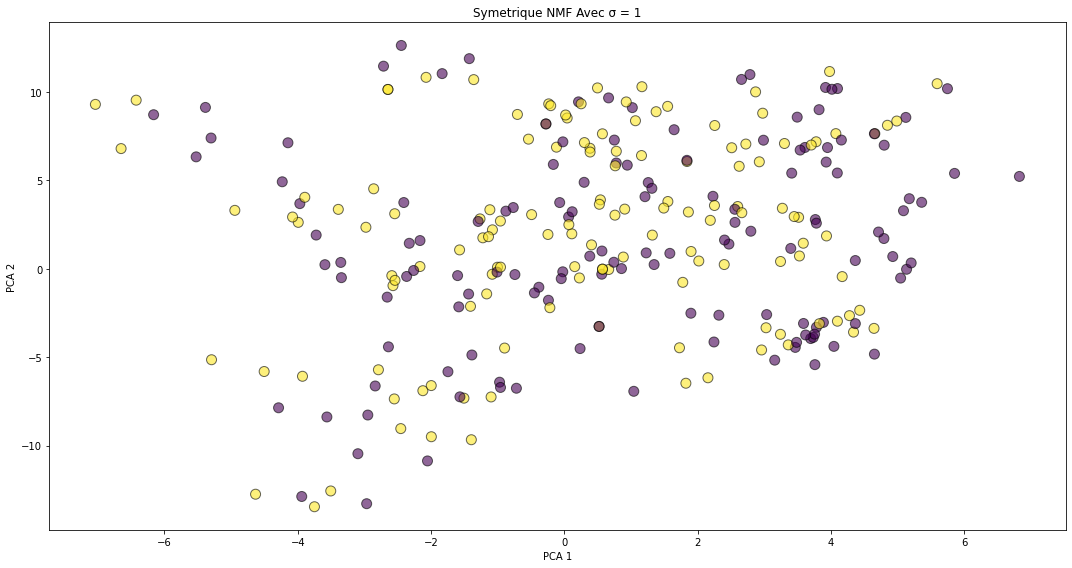

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 100, c = matResult102, edgecolor='black', linewidth=1, alpha=0.6);
plt.title('Symetrique NMF Avec σ = 1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

## PARTIE 5

**Question :**  Comparez les résultats obtenus

In [ ]:
import pandas as pd

# Création de dictionnaire qui contient toutes les valeurs de puréte et entropie des algorithmes utilisés
data_externe_dict = {"purete": [purete_semi_nmf, purete_nmf, purete_symetricNMF_P1, purete_symetricNMF_P2, purete_symetricNMF_P102], "entropy": [entropy_semi_nmf, entropy_nmf, entropy_symetricNMF_P1, entropy_symetricNMF_P2, entropy_symetricNMF_P102]}

# Création de dictionnaire qui contient toutes les indices internes des algorithmes utilisés
data_interne_dict = {"Davies Bouldin": [davies_bouldin_score_SEMI_NMF, davies_bouldin_score_NMF, davies_bouldin_score_symetricNMFP1, davies_bouldin_score_symetricNMFP2, davies_bouldin_score_symetricNMF102], "Calinski_harabasz": [calinski_harabasz_score_SEMI_NMF, calinski_harabasz_score_NMF, calinski_harabasz_score_symetricNMFP1, calinski_harabasz_score_symetricNMFP2, calinski_harabasz_score_symetricNMF102]}

# Transformation du dictionnaire data_externe vers un DataFrame pandas
data_externe = pd.DataFrame(data = data_externe_dict, index = ['Semi NMF', 'NMF', 'Symetrique NMF P=1', 'Symetrique NMF P=2', 'Symetrique NMF P=[1, 0, 2]'])

# Transformation du dictionnaire data_interne vers un DataFrame pandas
data_interne = pd.DataFrame(data = data_interne_dict, index = ['Semi NMF', 'NMF', 'Symetrique NMF P=1', 'Symetrique NMF P=2', 'Symetrique NMF P=[1, 0, 2]'])

data = pd.concat([data_externe, data_interne], axis=1)
data

,purete,entropy,Davies Bouldin,Calinski_harabasz
Semi NMF,0.672794,0.436486,0.772139,181.951647
NMF,0.419118,0.674760,0.929659,260.910466
Symetrique NMF P=1,0.466912,0.693120,12.933546,1.291935
Symetrique NMF P=2,0.514706,0.687839,22.692673,0.411091
"Symetrique NMF P=[1, 0, 2]",0.507353,0.693147,16.095463,0.831381


In [ ]:
data.style.highlight_max(color = "green")

,purete,entropy,Davies Bouldin,Calinski_harabasz
Semi NMF,0.672794,0.436486,0.772139,181.951647
NMF,0.419118,0.674760,0.929659,260.910466
Symetrique NMF P=1,0.466912,0.693120,12.933546,1.291935
Symetrique NMF P=2,0.514706,0.687839,22.692673,0.411091
"Symetrique NMF P=[1, 0, 2]",0.507353,0.693147,16.095463,0.831381


On conclue que les méthodes **NMF** et **semi NMF** permettent de faire un clustering en séparant lineairement les points (les billets). En revanche, l'avantage de la méthode **NMF Symetrique** arrive à faire un clustering d'une maniere plus complexe, donc elle donne des meilleurs résultats que la méthode **NMF Classique**.
